# Data Source
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Data Dictionary
## Data Set Information:
Bank Marketing Dataset: This dataset contains information related to a direct marketing campaign of a Portuguese banking institution. It includes both numeric variables such as age, duration, and balance, as well as categorical variables such as job, marital status, and education. (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

* The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y). *

## Attribute Information:

### Input variables:
### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [3]:
#import all config and libraries
if __name__ == '__main__' and '__file__' not in globals():
    %run base.ipynb
    
#in case imports have updated this notebook will re-run
%reload_ext autoreload
%autoreload 2

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok



 Numpy: 1.23.5

 sklearn: 1.2.1


# Reading data Step

In [4]:
#USER INPUT CELL

#Specify the file names here
# raw_file=r"https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv"
# raw_file=r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
raw_file_staged=r"C:\Users\John\Downloads\mle\data_raw.parquet"
response_variable = 'TODO'
#TODO : using pathlib delete parquet if exists or create one and save df_raw

threshold_category=13 #if object type columns have unique count less than or equal to this then convert to categorical type
#since this dataset has all columns as category cast all of them into category

data_profile_report=r"C:\Users\John\Downloads\mle\data_profile_report.html"

In [5]:
# # custom function to read in internet zip files
# raw_file=r"https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# #create a temporary folder, download the zip file from web, extract the file and read the file into pandas

# with tempfile.TemporaryDirectory() as tmpdirname:
#     print('created temporary directory',tmpdirname)

#     with requests.get(raw_file) as r:
#         with open(f'{tmpdirname}/bank.zip','wb') as f:
#             f.write(r.content)

#     with zipfile.ZipFile(f'{tmpdirname}/bank.zip','r') as zip_ref:
#         zip_ref.extractall(path=f'{tmpdirname}') #extract all files into tempdir

#         df=pd.read_csv(f'{tmpdirname}/bank-full.csv')
#         df.to_parquet(path=raw_file_staged,engine='pyarrow',index=False)
#         print(f'output file generated : {output_file}')


In [6]:
# if raw_file.endswith('csv'):
#     df=pd.read_csv(input_file)

# if raw_file.endswith('xls') or file.endswith('xlsx'):
#     df=pd.read_excel(input_file)


# # df.to_parquet(path=raw_file_staged,engine='pyarrow',index=False)

In [7]:
#Read in the parquet file and comment above cells

df=pd.read_parquet(raw_file_staged)
# df.to_parquet(path=raw_file_staged,engine='pyarrow',index=False)
# df=pd.read_csv(r"C:\Users\John\Downloads\mle\bank.csv")

In [8]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

# # profile.to_widgets() # The Notebook Widgets Interface
# profile.to_file(data_profile_report) #output report to file if widget interface gives errors


# Data cleaning steps

In [9]:
# Basic Data Cleaning - string processing
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [10]:
# Treat obviously incorrect values in your dataset

values_to_replace=['999','-1','999','unk','unknown','N/A','NA','Not Applicable','not applicable','na']

#select object columns where these values will be changed to blanks
obj_cols=df.select_dtypes(include='object').columns
for col in obj_cols:
    for v in values_to_replace:
        df[col]=df[col].replace(to_replace=v,value=np.nan)

# replace specific values : for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

# replace values to others

In [11]:
# USER INPUT -- FOR CASTING
# keep this cell for custom casting
# df[col]=df[col].astype('int')

In [12]:
#get text columns which have low cardinality i.e. unique values less than threshold
obj_cols = df.select_dtypes(include=['object']).nunique()<=13

#convert these columns into category
for col in obj_cols.index:
    df[col]=df[col].astype('category')

In [13]:
#Duplicate analysis

n_duplicates=df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

if n_duplicates != 0:
    print('Duplicated rows are : ')
    df[df.duplicated()]

You seem to have 0 duplicates in your database.


In [14]:
# MISSING VALUES
# check for missing values across columns
missing_values = df.isna().sum()

# print the number of missing values in each column
print(missing_values)


age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


<Figure size 1500x800 with 0 Axes>

Text(0.5, 58.7222222222222, 'Column Number')

Text(158.22222222222223, 0.5, 'Sample Number')

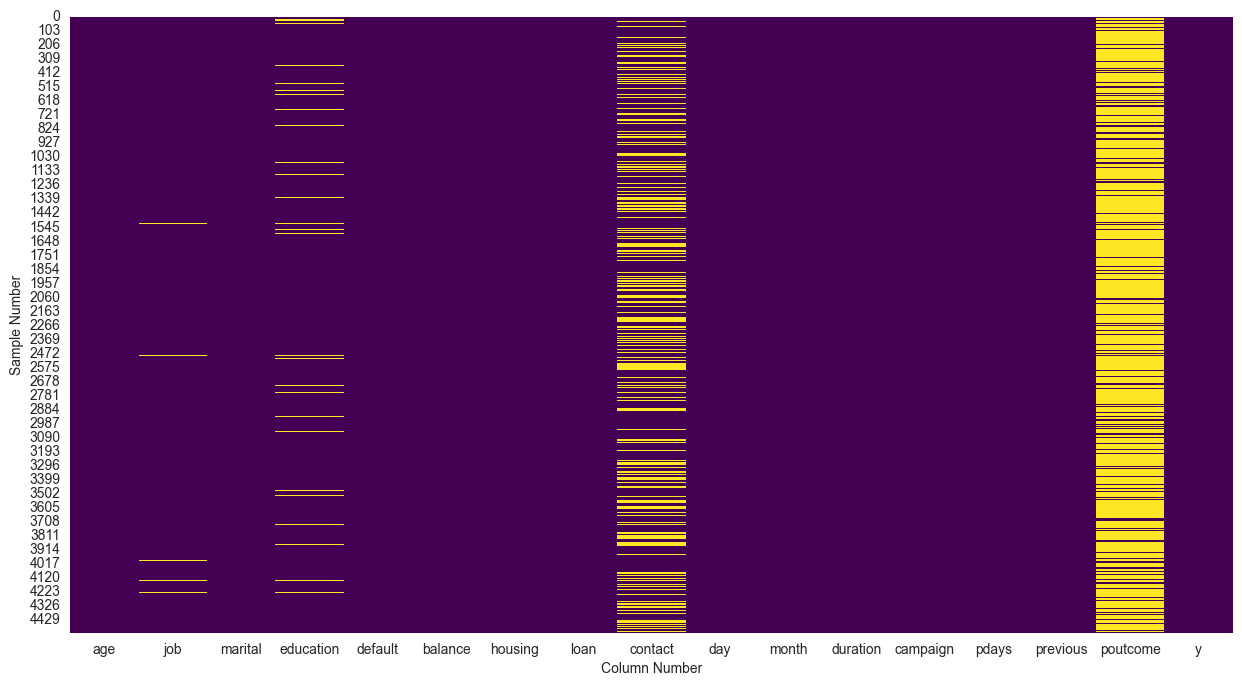

In [15]:
#Visualize missing values

plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [16]:
# Preview data
print('\n(a) : =====Data Preview====\n')
df.head(3)

print('\n(b) : =====Unique counts=====\n')
# pd.DataFrame(df.nunique()).T
df.select_dtypes(include=["object","category"]).nunique().sort_values(ascending=False)

print('\n(c) : =====Data Description=====\n')
df.describe(include='all').T

print('\n(D) : =====Data Types=====\n')
df.info()


(a) : =====Data Preview====



age         job  marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  previous poutcome   y
0   30  unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1     -1         0      NaN  no
1   33    services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1    339         4  failure  no
2   35  management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1    330         1  failure  no


(b) : =====Unique counts=====



month        12
job          11
marital       3
education     3
poutcome      3
default       2
housing       2
loan          2
contact       2
y             2
dtype: int64


(c) : =====Data Description=====



count unique         top  freq    mean     std      min   25%   50%     75%      max
age       4,521.0    NaN         NaN   NaN    41.2    10.6     19.0  33.0  39.0    49.0     87.0
job          4483     11  management   969     NaN     NaN      NaN   NaN   NaN     NaN      NaN
marital      4521      3     married  2797     NaN     NaN      NaN   NaN   NaN     NaN      NaN
education    4334      3   secondary  2306     NaN     NaN      NaN   NaN   NaN     NaN      NaN
default      4521      2          no  4445     NaN     NaN      NaN   NaN   NaN     NaN      NaN
balance   4,521.0    NaN         NaN   NaN 1,422.7 3,009.6 -3,313.0  69.0 444.0 1,480.0 71,188.0
housing      4521      2         yes  2559     NaN     NaN      NaN   NaN   NaN     NaN      NaN
loan         4521      2          no  3830     NaN     NaN      NaN   NaN   NaN     NaN      NaN
contact      3197      2    cellular  2896     NaN     NaN      NaN   NaN   NaN     NaN      NaN
day       4,521.0    NaN         NaN   NaN    15.9     8.2      1.0   9.0  16.0    21.0     31.0
month        4521     12         may  1398     NaN     NaN      NaN   NaN   NaN     NaN      NaN
duration  4,521.0    NaN         NaN   NaN   264.0   259.9      4.0 104.0 185.0   329.0  3,025.0
campaign  4,521.0    NaN         NaN   NaN     2.8     3.1      1.0   1.0   2.0     3.0     50.0
pdays     4,521.0    NaN         NaN   NaN    39.8   100.1     -1.0  -1.0  -1.0    -1.0    871.0
previous  4,521.0    NaN         NaN   NaN     0.5     1.7      0.0   0.0   0.0     0.0     25.0
poutcome      816      3     failure   490     NaN     NaN      NaN   NaN   NaN     NaN      NaN
y            4521      2          no  4000     NaN     NaN      NaN   NaN   NaN     NaN      NaN


(D) : =====Data Types=====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4483 non-null   category
 2   marital    4521 non-null   category
 3   education  4334 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    3197 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   816 non-null    category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)

# Insights : 

## Dataset level:
1. No missing values
2. total observations : 4,521

## Column level :
1. age : normally distributed with range of 19 to 87 centered around 41
2. marital : 3 values with mode as married
3. education : mode is secondary
4. default : most is False
5. balance : negative values present; left skewed ; high cardinality
6. duration : drop this as will not be available a priori before call, so no predictive value
7. campaign : most customers were called 2 times; some outliers : 50
8. pdays : has negative values which should be converted into blanks
9. previous : possible outliers
10. poutcome : most are unknown followed by failure, significant



In [17]:
#After converting into categorical columns run this :
def one_hot_renamed(base_col_name,df):
    d={}
    for col in df:
        d[col]=f'{base_col_name}_{col}'
    return df.rename(columns=d)
        
def encode_all_categorical(df):
    for col in df.columns:
        if df[col].dtype == 'category':
            one_hot = pd.get_dummies(df[col])
            df = df.drop(col, axis=1)
            df = pd.concat([df, one_hot_renamed(col,one_hot)], axis=1)
    return df
df_encoded=encode_all_categorical(df)

<Figure size 4000x4000 with 0 Axes>

<AxesSubplot: >

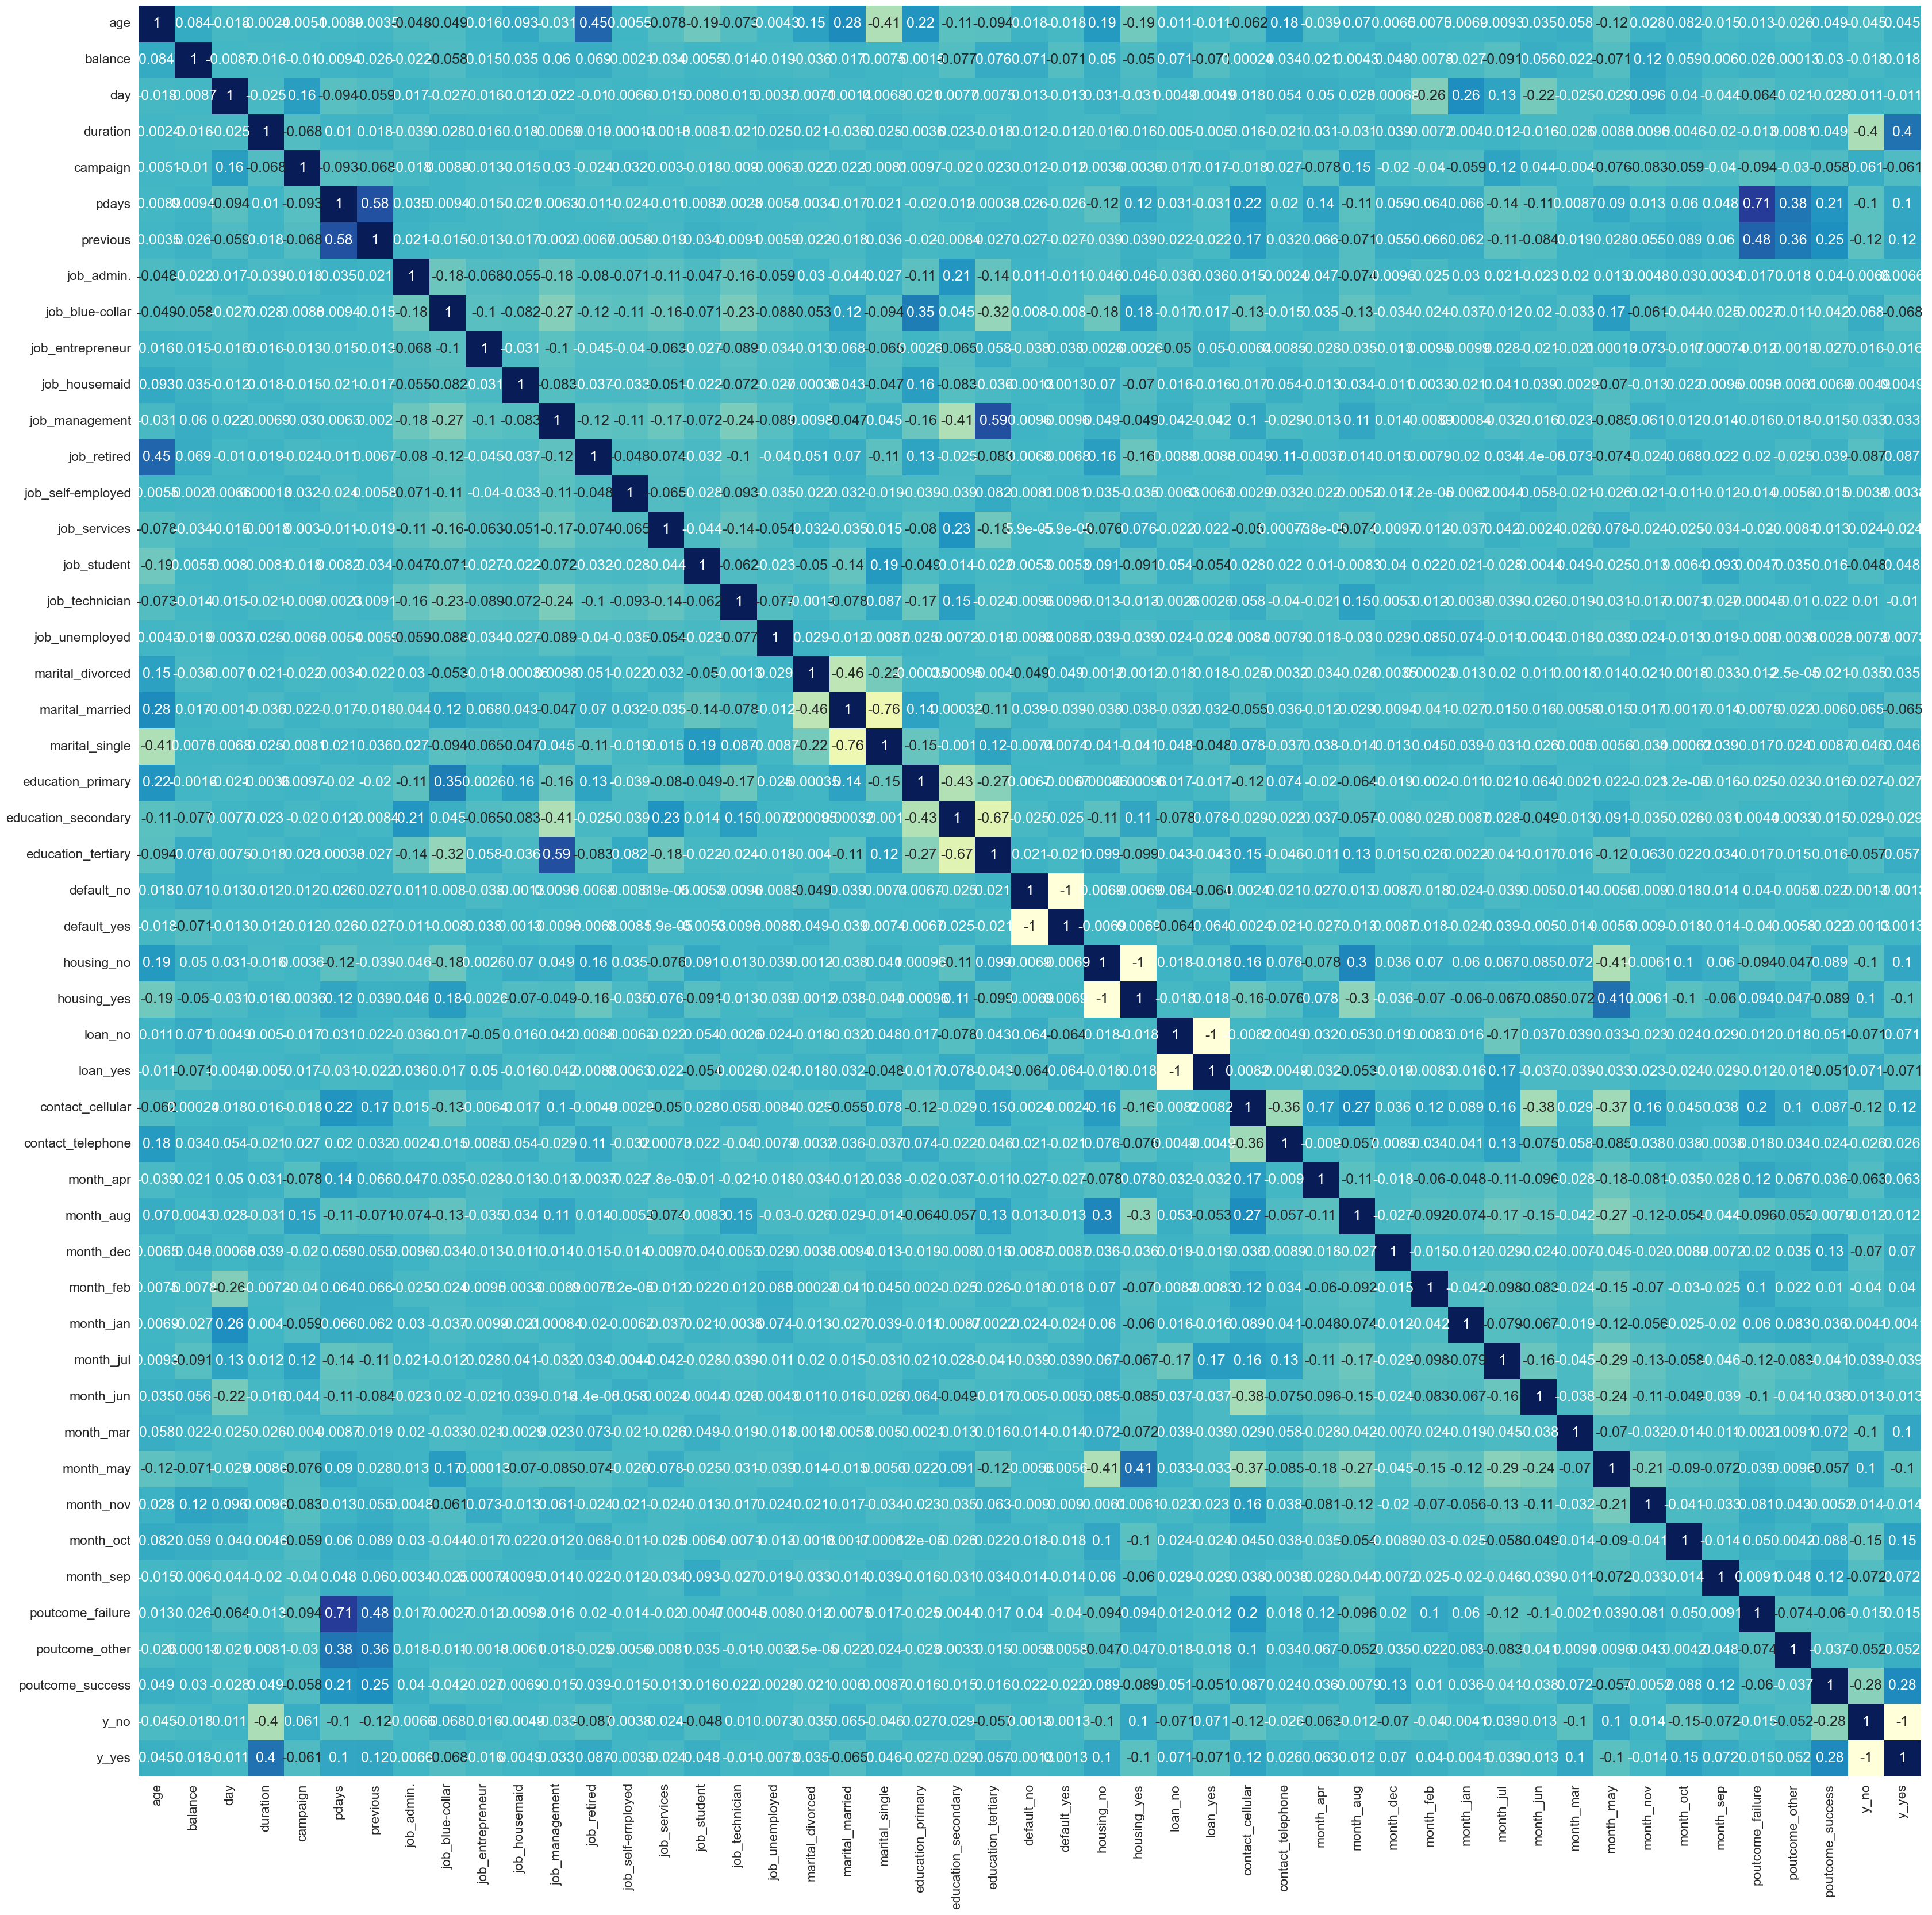

In [18]:
# create correlation matrix
corr_matrix = df_encoded.corr()

# plot heatmap using seaborn
#to reduce the ink in heatmap only show strong positive or negative correlations
# create mask for values outside of range (0.2, 0.4)
mask = np.zeros_like(corr_matrix)
mask[(corr_matrix > 0.4) | (corr_matrix < -0.4)] = False

plt.figure(figsize=(40,40))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.heatmap(corr_matrix, annot=True,cbar=False,cmap='YlGnBu',mask=mask)

# show plot
plt.show()

<Figure size 1500x800 with 0 Axes>

Text(0.5, 49.156249999999986, 'Column Number')

Text(148.75, 0.5, 'Sample Number')

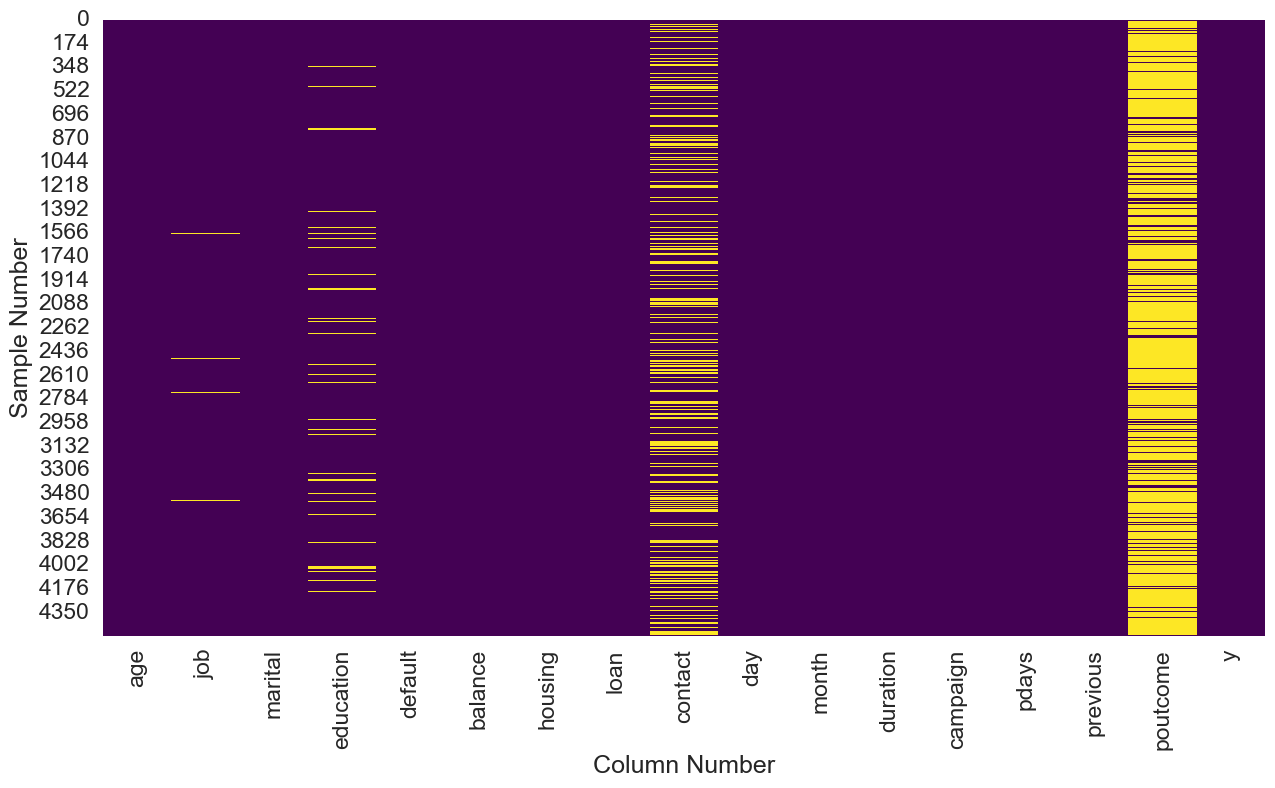

In [19]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

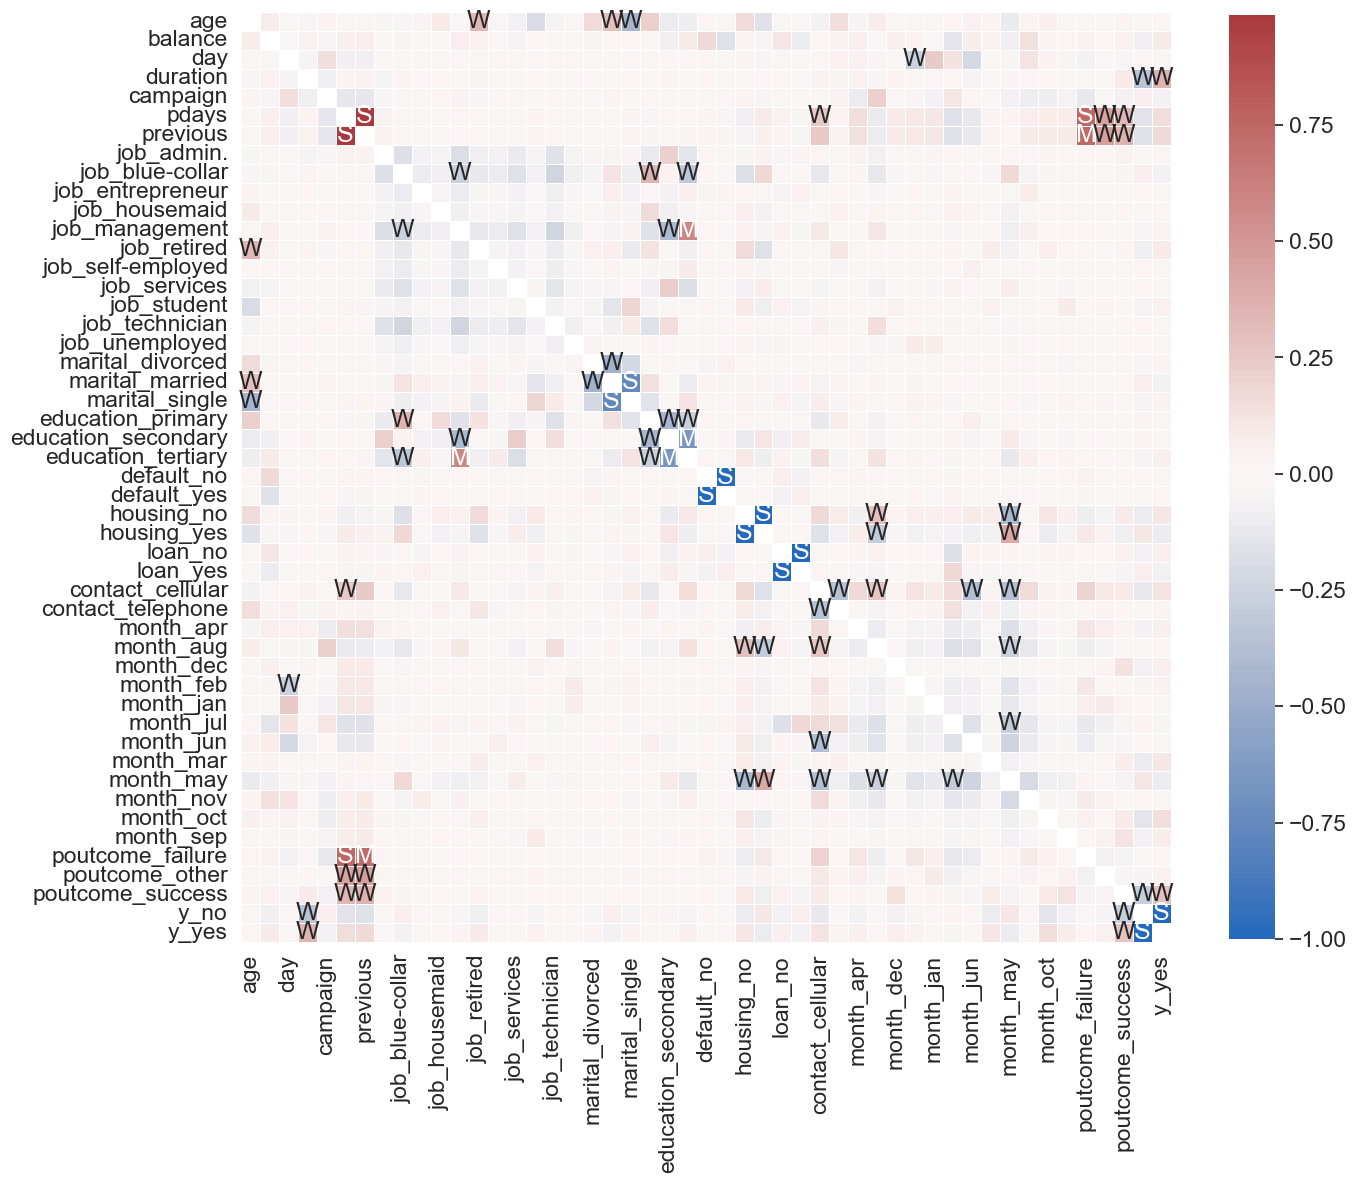

In [20]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df_encoded.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

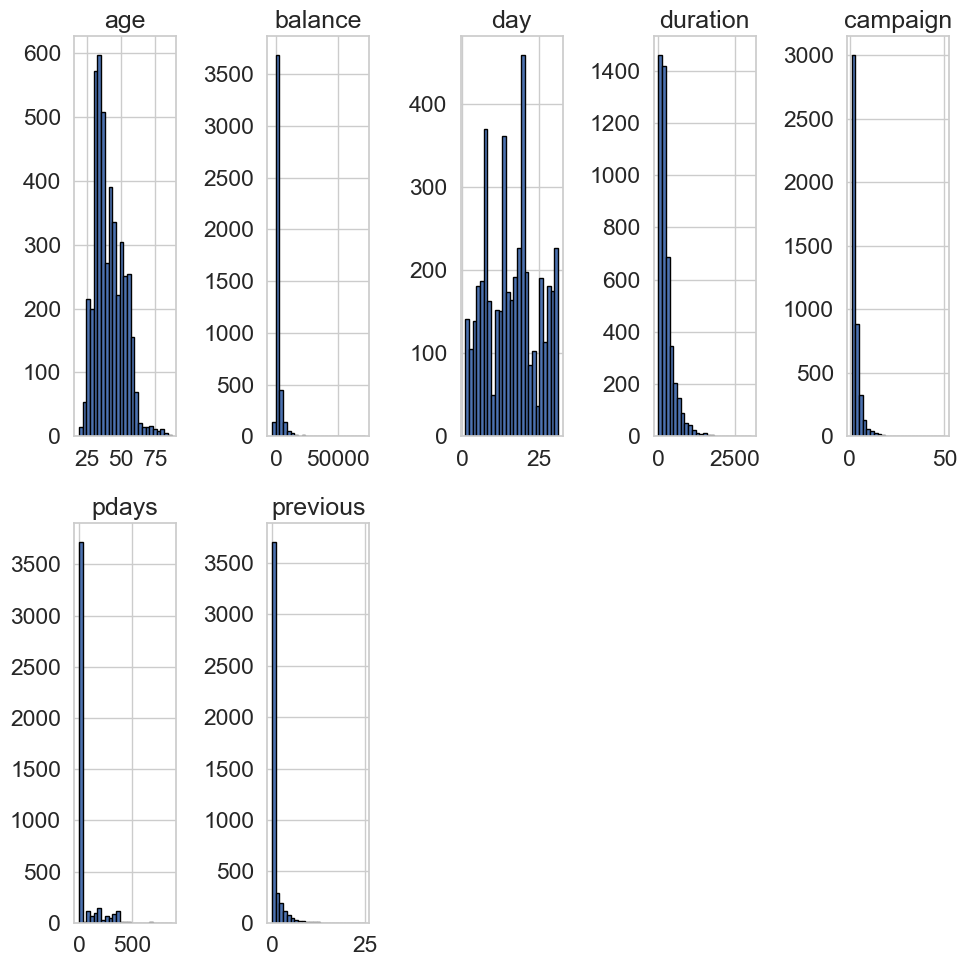

In [21]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(10, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

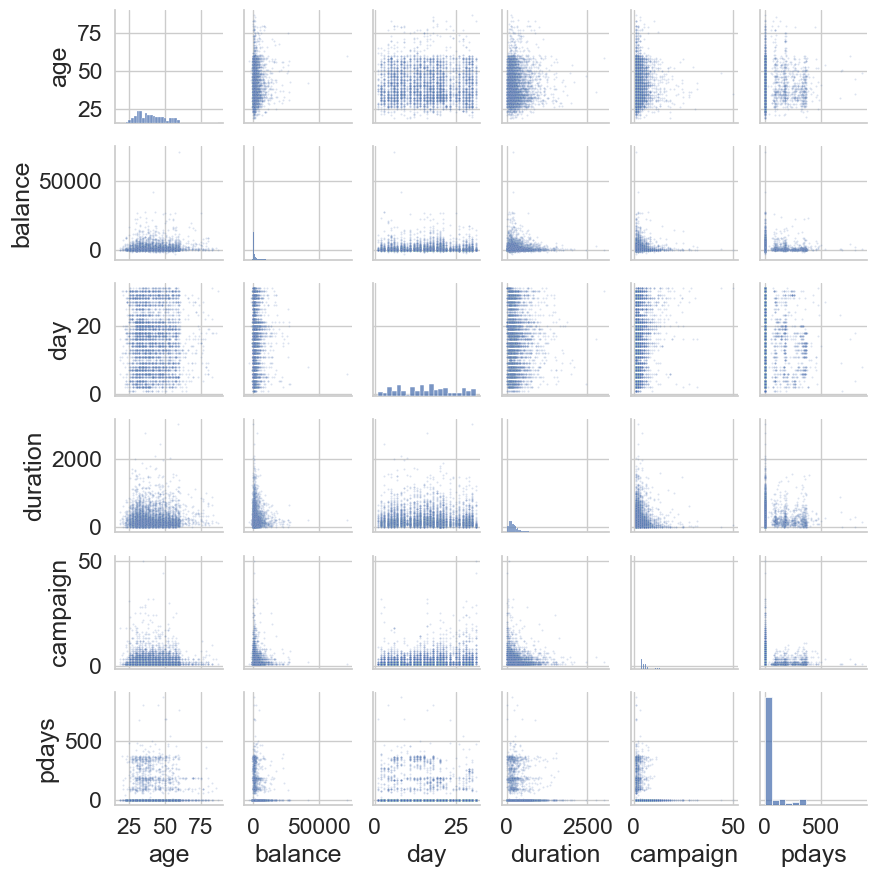

In [22]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


# Insights:
1. age is normally distributed
2. balance is left skewed
3. duration,campaign,pdays,previous are right skewed
4. high positive correlation between pdays and previous
5. high positive correlation between poutcome_Failure and pdays


# Pre-Processing

In [23]:
#look at values of each column that is in category:
#dont display columns with high cardinality

cols=df.select_dtypes(include=['category','object']).nunique()<=10
for col in ['job','marital']:
    values=sorted(df[col].dropna().unique())
    print(f'{col} ----> : {values}\n')

job ----> : ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']

marital ----> : ['divorced', 'married', 'single']



## Univariate Analysis

<AxesSubplot: xlabel='count', ylabel='job'>

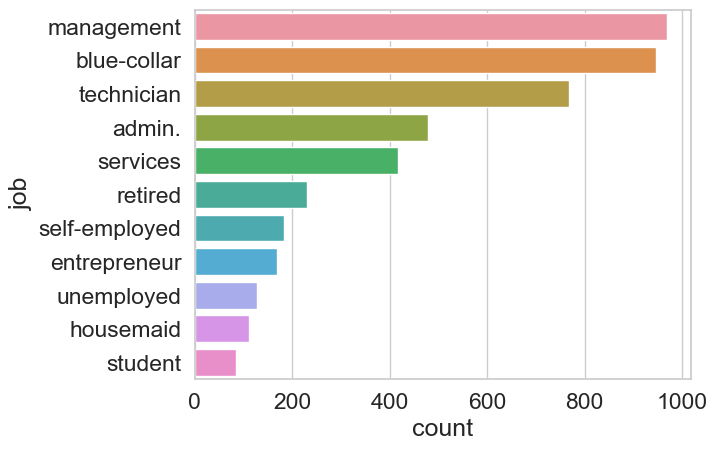

In [24]:
# df['job'].value_counts()
sns.countplot(y='job',data=df,order=df['job'].value_counts().index)

# Start Model Harness

In [38]:
#cast category into objects otherwise gives errors
cat_cols = df.select_dtypes(include=['category'])

for col in cat_cols.columns:
    df[col]=df[col].astype('object')
    
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(3616, 905)

(3616, 905)

In [39]:
#Split the y out into train/test/splits... 
# y is the target variable
y_train = (df_train_full.y).values
y_test = (df_test.y).values
del df_train_full['y']
del df_test['y']

In [40]:
len(y_train),len(y_test)

(3616, 905)

In [41]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [42]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [43]:
features

['age',
 'balance',
 'campaign',
 'contact',
 'contact=cellular',
 'contact=telephone',
 'day',
 'default=no',
 'default=yes',
 'duration',
 'education',
 'education=primary',
 'education=secondary',
 'education=tertiary',
 'housing=no',
 'housing=yes',
 'job',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'loan=no',
 'loan=yes',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jan',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'pdays',
 'poutcome',
 'poutcome=failure',
 'poutcome=other',
 'poutcome=success',
 'previous']

In [44]:
X_test.shape

(905, 51)

LogisticRegression(solver='liblinear')

LR: 0.890249 (0.026266)
Score for each of the 10 K-fold tests:  [0.93344026 0.8853137  0.90594595 0.9219494  0.88640681 0.83627153
 0.89966555 0.87070352 0.89144871 0.87134146]
LogisticRegression(solver='liblinear')
	Training time: 0.055s
	Prediction time: 0.511s



LinearDiscriminantAnalysis()

LDA: 0.893776 (0.022484)
Score for each of the 10 K-fold tests:  [0.92943063 0.8851735  0.89463617 0.92105655 0.89901983 0.85653495
 0.917025   0.8862074  0.88426616 0.86440549]
LinearDiscriminantAnalysis()
	Training time: 0.061s
	Prediction time: 0.540s



KNeighborsClassifier()

KNN: 0.737564 (0.030301)
Score for each of the 10 K-fold tests:  [0.79244733 0.69148265 0.72365904 0.77198661 0.74318061 0.76838906
 0.74227584 0.7117888  0.71506979 0.71535823]
KNeighborsClassifier()
	Training time: 0.008s
	Prediction time: 0.390s



DecisionTreeClassifier()

CART: 0.695730 (0.048306)
Score for each of the 10 K-fold tests:  [0.77254502 0.64794953 0.76345114 0.7125     0.62685206 0.67784532
 0.68573817 0.68004973 0.64581922 0.7445503 ]
DecisionTreeClassifier()
	Training time: 0.069s
	Prediction time: 0.397s



GaussianNB()

NB: 0.813596 (0.038390)
Score for each of the 10 K-fold tests:  [0.83013779 0.84342797 0.86819127 0.83061756 0.81673125 0.7427896
 0.82843606 0.7631271  0.84093373 0.77157012]
GaussianNB()
	Training time: 0.012s
	Prediction time: 0.139s



SVC(gamma='auto')

SVM: 0.707029 (0.040519)
Score for each of the 10 K-fold tests:  [0.71123423 0.64844024 0.73804574 0.80345982 0.69003115 0.72353934
 0.68522058 0.67621033 0.68091882 0.71318598]
SVC(gamma='auto')
	Training time: 1.255s
	Prediction time: 12.979s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5840128c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b584012e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b584012620>,
 'medians': [<matplotlib.lines.Line2D at 0x1b584013340>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b5840135e0>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'NB'),
 Text(6, 0, 'SVM')]

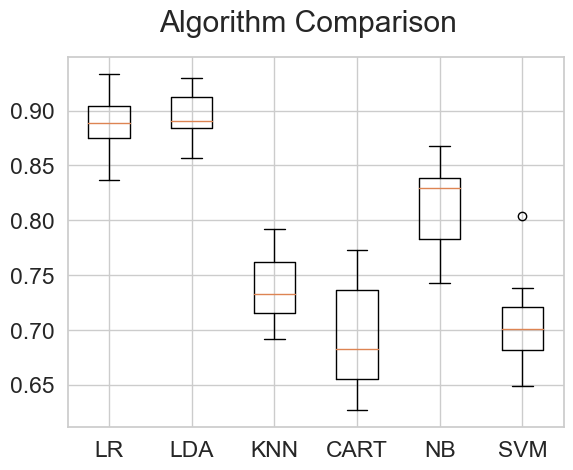

In [45]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [46]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [47]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

numpy.ndarray

list

numpy.ndarray

['age',
 'balance',
 'campaign',
 'contact',
 'contact=cellular',
 'contact=telephone',
 'day',
 'default=no',
 'default=yes',
 'duration',
 'education',
 'education=primary',
 'education=secondary',
 'education=tertiary',
 'housing=no',
 'housing=yes',
 'job',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'loan=no',
 'loan=yes',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jan',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'pdays',
 'poutcome',
 'poutcome=failure',
 'poutcome=other',
 'poutcome=success',
 'previous']

In [49]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [50]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.101 age
0.087 balance
0.033 campaign
0.000 contact
0.011 contact=cellular
0.005 contact=telephone
0.110 day
0.006 default=no
0.002 default=yes
0.265 duration
0.000 education
0.000 education=primary
0.009 education=secondary
0.013 education=tertiary
0.005 housing=no
0.003 housing=yes
0.000 job
0.003 job=admin.
0.005 job=blue-collar
0.005 job=entrepreneur
0.006 job=housemaid
0.017 job=management
0.007 job=retired
0.000 job=self-employed
0.003 job=services
0.002 job=student
0.008 job=technician
0.002 job=unemployed
0.004 loan=no
0.005 loan=yes
0.005 marital=divorced
0.005 marital=married
0.005 marital=single
0.014 month=apr
0.011 month=aug
0.004 month=dec
0.006 month=feb
0.002 month=jan
0.008 month=jul
0.009 month=jun
0.012 month=mar
0.016 month=may
0.010 month=nov
0.021 month=oct
0.003 month=sep
0.046 pdays
0.000 poutcome
0.006 poutcome=failure
0.002 poutcome=other
0.080 poutcome=success
0.016 previous


Text(0, 0, '753')

Text(1, 0, '56')

Text(0, 1, '54')

Text(1, 1, '42')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

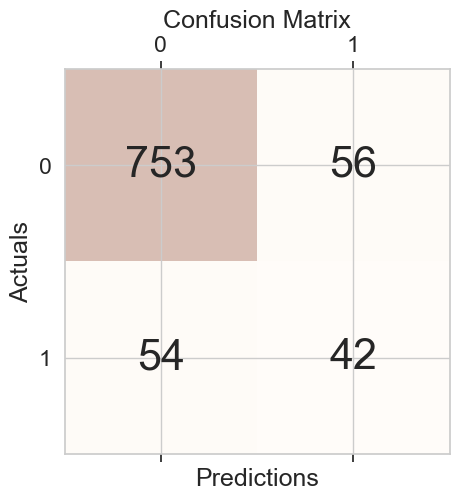

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93       809
         yes       0.43      0.44      0.43        96

    accuracy                           0.88       905
   macro avg       0.68      0.68      0.68       905
weighted avg       0.88      0.88      0.88       905

